# 7. Reverse Integer

https://leetcode.com/problems/reverse-integer/description/

In [2]:
# Method 1
def reverse(x: int) -> int:
    if x == 0:
        return 0

    negative = True if x < 0 else False
    if negative:
        x = -x  # IMPORTANT

    reverse_num = []
    while x:
        n = str(x % 10)
        reverse_num.append(n)
        x //= 10

    ans = int(''.join(reverse_num))

    if negative:
        ans = -ans

    if ans < -2**31 or ans > 2**31 - 1:
        return 0
    return ans

# Time: O(n)
# Space: O(n)

# Method 2
def reverse(x: int) -> int:
    if x >= 0:
        res = int(str(x)[::-1])
    else:
        res=int("-"+str(abs(x))[::-1])
    return res if -2**31 <= res <= 2**31 - 1 else 0

# Time: O(log(x))

x = 120 # 123, -123, 120
print('output: ', reverse(x))

output:  21


# 9. Palindrome Number

https://leetcode.com/problems/palindrome-number/description/

In [3]:
# Method 1
def isPalindrome(x: int) -> bool:
    return str(x) == str(x)[::-1]

# Time: O(n)
# Space: O(1)

# Method 2
def isPalindrome(x: int) -> bool:
    
    if x < 0:
        return False

    reversed_num = 0
    temp = x
    while temp:
        digit = temp % 10
        reversed_num = reversed_num * 10 + digit  # IMPORTANT
        temp //= 10

    return reversed_num == x

x = 121
print(isPalindrome(x))

True


# 14. Longest Common Prefix

https://leetcode.com/problems/longest-common-prefix/description/

In [4]:
from typing import List

def longestCommonPrefix(strs: List[str]) -> str:

    ans = ""
    strs = sorted(strs) # IMPORTANT
    first = strs[0]
    last = strs[-1]
    for i in range(min(len(first), len(last))):
        if(first[i] != last[i]):
            return ans
        ans += first[i]

    return ans

# Time: O(nlogn)
# Space: O(1)

strs = ["flower", "flow", "flight"]
print(longestCommonPrefix(strs))

fl


# 29. Divide Two Integers

https://leetcode.com/problems/divide-two-integers/description/

In [6]:
def divide(dividend: int, divisor: int) -> int:

    sign = -1 if (dividend >= 0 and divisor < 0) or (dividend < 0 and divisor >= 0) else 1
    dividend = abs(dividend)
    divisor = abs(divisor)

    # result = len(range(0, dividend-divisor+1, divisor))  # COOL!
    result = 0
    while dividend >= divisor:
        dividend -= divisor
        result += 1
        
    if sign == -1:
        result = -result
    
    minus_limit = -(2**31)
    plus_limit = (2**31 - 1)
    result = min(max(result, minus_limit), plus_limit)

    return result

'''
The time complexity of the provided code is O(log(dividend/divisor)), and the space complexity is O(1).
Time Complexity:
In each iteration of the loop, the code subtracts the divisor from the dividend.
The number of iterations is determined by how many times dividend can be divided by divisor.
Since in each iteration the value of dividend is approximately halved, the time complexity is
logarithmic with respect to the ratio dividend/divisor.
Space Complexity:
The space complexity is O(1) because the code uses a constant amount of extra space regardless of the input size.
'''

dividend, divisor = 10, 3  # 10, 3 | 7, -3
print(divide(dividend, divisor))

3


# 33. Search in Rotated Sorted Array

https://leetcode.com/problems/search-in-rotated-sorted-array/description/

In [7]:
from typing import List

def search(nums: List[int], target: int) -> int:

    left, right = 0, len(nums) - 1

    while left <= right:
        mid = (left + right) // 2
        print('left, right, mid, nums[mid]: ', left, right, mid, nums[mid])

        if nums[mid] == target:
            return mid

        # Check if left half is sorted
        if nums[left] <= nums[mid]:
            if nums[left] <= target < nums[mid]:
                right = mid - 1
            else:
                left = mid + 1
        # Otherwise, right half is sorted
        else:
            if nums[mid] < target <= nums[right]:
                left = mid + 1
            else:
                right = mid - 1

    return -1

# Time Complexity: The time complexity is O(log⁡n) since we're performing a binary search over the elements of the array.
# Space Complexity: The space complexity is O(1) because we only use a constant amount of space to store our variables.

nums = [4,5,6,7,0,1,2]
target = 0
print(search(nums, target))

left, right, mid, nums[mid]:  0 6 3 7
left, right, mid, nums[mid]:  4 6 5 1
left, right, mid, nums[mid]:  4 4 4 0
4


# 37. Sudoku Solver
https://leetcode.com/problems/sudoku-solver/description/

In [8]:
from typing import List

def solveSudoku(board: List[List[str]]) -> None:

    n = 9

    def isValid(row, col, num):
        for i in range(n):
            if board[i][col] == num or board[row][i] == num or board[3*(row//3)+i//3][3*(col//3)+i%3] == num: # COOL!
                return False
        return True

    def solve(row, col):
        if row == n:
            return True
        if col == n:
            return solve(row + 1, 0)

        if board[row][col] == ".":
            for num in map(str, range(1, 10)): # COOL!
                if isValid(row, col, num):
                    board[row][col] = num
                    if solve(row, col + 1):
                        return True
                    else:
                        board[row][col] = "."
            return False
        else:
            return solve(row, col + 1)

    solve(0, 0)

board = [["5","3",".",".","7",".",".",".","."], ["6",".",".","1","9","5",".",".","."], [".","9","8",".",".",".",".","6","."],
["8",".",".",".","6",".",".",".","3"], ["4",".",".","8",".","3",".",".","1"], ["7",".",".",".","2",".",".",".","6"],
[".","6",".",".",".",".","2","8","."], [".",".",".","4","1","9",".",".","5"], [".",".",".",".","8",".",".","7","9"]]
solveSudoku(board)
print(board)

[['5', '3', '4', '6', '7', '8', '9', '1', '2'], ['6', '7', '2', '1', '9', '5', '3', '4', '8'], ['1', '9', '8', '3', '4', '2', '5', '6', '7'], ['8', '5', '9', '7', '6', '1', '4', '2', '3'], ['4', '2', '6', '8', '5', '3', '7', '9', '1'], ['7', '1', '3', '9', '2', '4', '8', '5', '6'], ['9', '6', '1', '5', '3', '7', '2', '8', '4'], ['2', '8', '7', '4', '1', '9', '6', '3', '5'], ['3', '4', '5', '2', '8', '6', '1', '7', '9']]


# 39. Combination Sum
https://leetcode.com/problems/combination-sum/description/

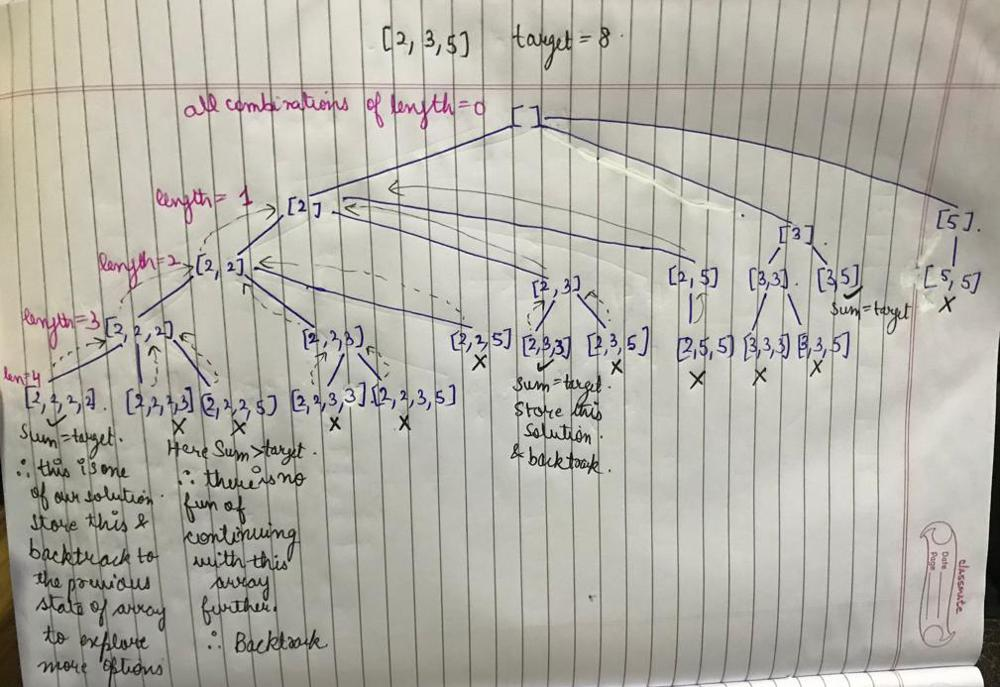

In [9]:
from typing import List

def combinationSum(candidates: List[int], target: int) -> List[List[int]]:

    ret = []
    backtrack(candidates, target, [], ret)
    return ret
    
def backtrack(nums, target, path, ret):
    if target < 0:
        return # backtracking
    if target == 0:
        ret.append(path)
        return # backtracking
    for i in range(len(nums)):
        backtrack(nums[i:], target-nums[i], path+[nums[i]], ret)

'''
Time complexity:
The time complexity of the backtracking function is O(2^n), where n is the length of the input list can.
This is because there are 2^n possible combinations of elements from the input list.
Therefore, the time complexity of the entire function is O(2^n) as well.

Space complexity:
The space complexity of the backtracking function is O(n) as the maximum number of elements that can be stored in the current combination at any point is n.
The space complexity of the entire function is also O(2^n) as there can be at most 2^n valid combinations.
'''

nums = [2,3,6,7]
target = 7
print(combinationSum(nums, target))

[[2, 2, 3], [7]]


# 40. Combination Sum II
https://leetcode.com/problems/combination-sum-ii/description/

In [10]:
from typing import List

def combinationSum2(candidates: List[int], target: int) -> List[List[int]]:
        
    candidates.sort()
    res = []
    backtrack(candidates, target, [], res, 0)
    return res

def backtrack(candidates, target, path, res, start):
    if target == 0:
        res.append(path)
        return
    for i in range(start, len(candidates)):
        if start < i and candidates[i] == candidates[i - 1]:
            continue
        if target < candidates[i]:
            break
        backtrack(candidates, target - candidates[i], path + [candidates[i]], res, i + 1)

nums = [10,1,2,7,6,1,5]
target = 8
print(combinationSum2(nums, target))

[[1, 1, 6], [1, 2, 5], [1, 7], [2, 6]]


# 41. First Missing Positive
https://leetcode.com/problems/first-missing-positive/description/

In [11]:
from typing import List

def firstMissingPositive(nums: List[int]) -> int:
        
    nums = set(nums)  # COOL!
    i = 1
    while True:
        if i not in nums:
            return i
        i += 1

nums = [1,2,0]
print(firstMissingPositive(nums))

3


# 53. Maximum Subarray
https://leetcode.com/problems/maximum-subarray/description/

In [12]:
from typing import List

# Kadane’s algorithm
def maxSubArraySum(nums: List[int]) -> int:

    max_sum = float('-inf')
    curr_max_sum = 0

    for i in range(len(nums)):
        curr_max_sum += nums[i]
        if max_sum < curr_max_sum:
            max_sum = curr_max_sum

        if curr_max_sum < 0:
            curr_max_sum = 0

    return max_sum

# Time: O(n)
# Space: O(1)

nums = [-2,1,-3,4,-1,2,1,-5,4]
result = maxSubArraySum(nums)
print('result: ', result)

result:  6


# 235. Lowest Common Ancestor of a Binary Search Tree

https://leetcode.com/problems/lowest-common-ancestor-of-a-binary-search-tree/description/

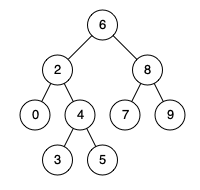

In [13]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

def lowestCommonAncestor(root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':

        temp = root 
        while temp:
            if p.val < temp.val and q.val < temp.val:
                temp = temp.left
            elif temp.val < p.val and temp.val < q.val:
                temp = temp.right
            else:
                return temp

'''
Time complexity: O(h)
h is the height of the tree.
In the worst case, when the tree is skewed (completely unbalanced), the time complexity is O(n),
where n is the number of nodes in the tree.
Space complexity: O(1)
        The algorithm uses only a constant amount of extra space.
'''


'\nTime complexity: O(h)\nh is the height of the tree.\nIn the worst case, when the tree is skewed (completely unbalanced), the time complexity is O(n),\nwhere n is the number of nodes in the tree.\nSpace complexity: O(1)\n        The algorithm uses only a constant amount of extra space.\n'

# 1044. Longest Duplicate Substring
https://leetcode.com/problems/longest-duplicate-substring/description/

In [14]:
def solution(s: str) -> str:
    """
    This problem can be solved using Sliding Window Technique.
    Logic:
    1. Iterate over the string from 0th index
    2. For each index, define a window of 1 initially.
    3. Check for the existence of the window in the remaining string:
        a. If found, increase the size of window by 1 and repeat.
        b. Else Goto next index. For next index, the size window will not start by 1 again as we have already found for 1.
            So for every next index, size of window will start from the size at previous index to avoid checking for repeating size.
    """
    
    ans = ''
    j = 1
    for i in range(len(s)):
        window = s[i:i+j]
        heystack = s[i+1:]
        print('window, heystack: ', window, heystack)
        while window in heystack:
            ans = window
            j += 1
            window = s[i:i+j]
            print('window 2:', window)
            
    return ans

# Time: O(n^2)
# Space: O(n)

s = 'banana'
result = solution(s)
print('result: ', result)

window, heystack:  b anana
window, heystack:  a nana
window 2: an
window 2: ana
window 2: anan
window, heystack:  nana ana
window, heystack:  ana na
window, heystack:  na a
window, heystack:  a 
result:  ana
